In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import pandas as pd #para ler, visualizar e printar infos do df
import matplotlib.pyplot as plt #para construir e customizar gráficos
import seaborn as sns #para visualizar uns gráficos
import numpy as np #numpy porque é sempre bom importar numpy né 
import math
import datetime
import plotly.express as px
from pandas_profiling import ProfileReport

# Carregando conjunto de dados e tratamentos iniciais

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/OncoAI/Grupo 5 - OncoAI/Projeto/Base_de_dados/Merge_Trat.csv')
df.head()

,record_id,escolaridade,idade_no_primeiro_diagnostico,sexo,raca,uf_nascimento,uf_residencia,data_ultima_informacao,ultima_informacao,tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos,...,classificacao_tnm_patologico_t,com_recidiva_a_distancia,com_recidiva_regional,com_recidiva_local,recidiva,quimio,radio,cirurgia,hormonio,tipo_de_tratamento
0,302,ENS. FUNDAMENTAL INCOMPLETO,51.0,1,NaN,NaN,NaN,2014-04-26,0.0,2225.0,...,Nao informado,0,0,0,0,1,1,1,1,NaN
1,710,ENSINO MÉDIO,58.0,1,NaN,NaN,NaN,2016-11-17,1.0,3294.0,...,Nao informado,0,1,1,0,1,0,1,0,0.0
2,752,ENS. FUNDAMENTAL INCOMPLETO,56.0,1,NaN,NaN,NaN,2019-05-02,1.0,4153.0,...,2,0,0,0,0,0,0,0,0,NaN
3,1367,ENS. FUNDAMENTAL INCOMPLETO,63.0,1,NaN,NaN,NaN,2011-09-29,0.0,1331.0,...,1A,0,1,0,1,0,0,0,0,NaN
4,1589,ENS. FUNDAMENTAL COMPLETO,42.0,1,NaN,NaN,NaN,2017-05-24,1.0,3290.0,...,Nao informado,0,0,0,0,1,1,1,0,NaN


In [ ]:
df.shape

(3791, 100)

In [ ]:
df.columns

Index(['record_id', 'escolaridade', 'idade_no_primeiro_diagnostico', 'sexo',
       'raca', 'uf_nascimento', 'uf_residencia', 'data_ultima_informacao',
       'ultima_informacao',
       'tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos',
       'ja_ficou_gravida', 'quantas_vezes_ficou_gravida', 'numero_de_partos',
       'idade_na_primeira_gestacao', 'abortou',
       'amamentou_na_primeira_gestacao', 'tempo_de_amamentacao',
       'historia_familiar_de_cancer_relacionado_a_síndrome_de_cancer_de_mama_e_ovario_hereditaria(choice=Nao)',
       'historia_familiar_de_cancer_relacionado_a_síndrome_de_cancer_de_mama_e_ovario_hereditaria(choice=Sim_1_grau,apenas_um_caso)',
       'historia_familiar_de_cancer_relacionado_a_síndrome_de_cancer_de_mama_e_ovario_hereditaria(choice=Sim_1_grau,mais_de_um_caso)',
       'historia_familiar_de_cancer_relacionado_a_síndrome_de_cancer_de_mama_e_ovario_hereditaria(choice=Sim_2_grau,apenas_um_caso)',
       'historia_familiar_de_cancer_rela

In [ ]:
dfr = df

# Filtrando e organizando

In [ ]:
dfr = dfr[dfr["regime_tratamento"].isnull()==False][dfr["regime_tratamento"]!=2][dfr["regime_tratamento"]!=3]

<ipython-input-7-6b187c878a1b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfr = dfr[dfr["regime_tratamento"].isnull()==False][dfr["regime_tratamento"]!=2][dfr["regime_tratamento"]!=3]


In [ ]:
dfr = dfr[dfr["ultima_informacao"]!= 0][dfr["ultima_informacao"]!= 2]

<ipython-input-8-212e2b847256>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfr = dfr[dfr["ultima_informacao"]!= 0][dfr["ultima_informacao"]!= 2]


In [ ]:
dfr = dfr[dfr['recidiva']!=1]

In [ ]:
dfr

,record_id,escolaridade,idade_no_primeiro_diagnostico,sexo,raca,uf_nascimento,uf_residencia,data_ultima_informacao,ultima_informacao,tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos,...,classificacao_tnm_patologico_t,com_recidiva_a_distancia,com_recidiva_regional,com_recidiva_local,recidiva,quimio,radio,cirurgia,hormonio,tipo_de_tratamento
1,710,ENSINO MÉDIO,58.0,1,NaN,NaN,NaN,2016-11-17,1.0,3294.0,...,Nao informado,0,1,1,0,1,0,1,0,0.0
9,1960,ENS. FUNDAMENTAL INCOMPLETO,29.0,1,NaN,NaN,NaN,2010-06-27,1.0,699.0,...,Nao informado,0,0,0,0,0,0,0,0,NaN
15,2157,ENS. FUNDAMENTAL COMPLETO,51.0,1,NaN,NaN,NaN,2009-04-10,1.0,385.0,...,1,0,0,0,0,0,0,0,0,0.0
26,2864,ENS. FUNDAMENTAL INCOMPLETO,39.0,1,NaN,NaN,NaN,2021-05-17,1.0,1839.0,...,Nao informado,0,0,0,0,0,1,0,0,1.0
28,3357,ENS. FUNDAMENTAL COMPLETO,48.0,1,NaN,NaN,NaN,2012-02-20,1.0,1428.0,...,Nao informado,0,0,0,0,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,82100,NaN,53.0,1,NaN,NaN,NaN,2021-07-25,1.0,366.0,...,Nao informado,0,0,0,0,1,1,1,0,1.0
3783,82112,NaN,53.0,1,NaN,NaN,NaN,2021-10-04,1.0,370.0,...,Nao informado,0,0,0,0,0,0,0,0,1.0
3784,82118,NaN,53.0,1,NaN,NaN,NaN,2021-03-24,1.0,391.0,...,Nao informado,0,0,0,0,0,0,0,0,0.0
3785,82122,NaN,53.0,1,NaN,NaN,NaN,2022-02-15,1.0,589.0,...,Nao informado,0,0,0,0,0,0,0,0,NaN


# Gerando df de teste filtrado e organizado

In [ ]:
test = dfr[["idade_no_primeiro_diagnostico","tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos","subtipo_tumoral","receptor_de_estrogenio","receptor_de_progesterona","ki67_percentage","estadio_clinico","classificacao_tnm_clinico_t","classificacao_tnm_clinico_n","regime_tratamento"]]

## Organizando a quantificação de estrogenio

In [ ]:
test["receptor_de_estrogenio"] = test["receptor_de_estrogenio"].astype("int")

<ipython-input-12-dd2dd840bba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["receptor_de_estrogenio"] = test["receptor_de_estrogenio"].astype("int")


##Organizando a quantificação de progesterona

In [ ]:
test["receptor_de_progesterona"] = test["receptor_de_progesterona"].astype("int")

<ipython-input-13-4ff6d1f757ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["receptor_de_progesterona"] = test["receptor_de_progesterona"].astype("int")


##Organizando o tempo desde ultimo tumor

In [ ]:
test = test[test["tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos"].isnull()==False]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test[["tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos","regime_tratamento"]] = scaler.fit_transform(test[["tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos","regime_tratamento"]])


<ipython-input-14-143ed4e9e200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[["tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos","regime_tratamento"]] = scaler.fit_transform(test[["tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos","regime_tratamento"]])


##Organizando a classificação TNM-T

In [ ]:
test["classificacao_tnm_clinico_t"].unique()

array(['3', '1', '2', '1B', 'IS', '1C', 'X - nao foi possivel determinar',
       '4D', '4B', '4C', '4', '1A', '4A', 'CDIS', '3A'], dtype=object)

In [ ]:
test = test[test["classificacao_tnm_clinico_t"]!="X - nao foi possivel determinar"][test["classificacao_tnm_clinico_t"]!="Y: Na"]

<ipython-input-16-2042a719347e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = test[test["classificacao_tnm_clinico_t"]!="X - nao foi possivel determinar"][test["classificacao_tnm_clinico_t"]!="Y: Na"]


In [ ]:
test["classificacao_tnm_clinico_t"] = test["classificacao_tnm_clinico_t"].replace({"2":2,
                                                                                   "3":3,
                                                                                   "1C":1,
                                                                                   "4B":4,
                                                                                   "4D":4,
                                                                                   "1":1,
                                                                                   "4":4,
                                                                                   "1B":1,
                                                                                   "1A":1,
                                                                                   "4C":4,
                                                                                   "4A":4,
                                                                                   "IS":0,
                                                                                   "CDIS":0,
                                                                                   "3A":3})

In [ ]:
test["classificacao_tnm_clinico_t"] = test["classificacao_tnm_clinico_t"].astype("int")

##Organizando a classificação TNM-N

In [ ]:
test["classificacao_tnm_clinico_n"].unique()


array(['1', '2', '0', '3A', '2A', '3', '3B', '2B', '3C'], dtype=object)

In [ ]:
test["classificacao_tnm_clinico_n"] = test["classificacao_tnm_clinico_n"].replace({"1":1,
                                                                                   "2":2,
                                                                                   "0":0,
                                                                                   "3A":3,
                                                                                   "2A":2,
                                                                                   "3":3,
                                                                                   "2B":2,
                                                                                   "3B":3,
                                                                                   "3C":3})

test["classificacao_tnm_clinico_n"].astype("int8")

1       1
9       2
15      0
26      1
28      1
       ..
3781    1
3783    1
3784    0
3785    0
3786    0
Name: classificacao_tnm_clinico_n, Length: 1681, dtype: int8

In [ ]:
test["classificacao_tnm_clinico_n"] = test["classificacao_tnm_clinico_n"].astype("int")

##Organizando o grupo de estadio clínico

In [ ]:
test["estadio_clinico"] = test["estadio_clinico"].astype("int")

##Organizando o grupo de subtipo tumoral

In [ ]:
test["subtipo_tumoral"] = test["subtipo_tumoral"].astype("int")

In [ ]:
test

,idade_no_primeiro_diagnostico,tempo_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos,subtipo_tumoral,receptor_de_estrogenio,receptor_de_progesterona,ki67_percentage,estadio_clinico,classificacao_tnm_clinico_t,classificacao_tnm_clinico_n,regime_tratamento
1,58.0,0.798352,2,1,0,20.0,3,3,1,0.0
9,29.0,0.169413,3,0,0,30.0,3,3,2,1.0
15,51.0,0.093311,3,2,3,30.0,1,1,0,0.0
26,39.0,0.445710,2,1,1,85.0,2,2,1,1.0
28,48.0,0.346098,3,2,3,30.0,2,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...
3781,53.0,0.088706,3,2,3,50.0,3,4,1,1.0
3783,53.0,0.089675,3,2,3,90.0,3,3,1,1.0
3784,53.0,0.094765,3,2,3,30.0,1,1,0,0.0
3785,53.0,0.142753,2,1,1,40.0,2,2,0,0.0


#Ajustes para o testar os modelos

In [ ]:
from sklearn.model_selection import train_test_split

X = test.drop(columns=["regime_tratamento"])
y = test["regime_tratamento"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,
                                                    random_state = 50)


# Modelo sem tunar

In [ ]:
# importando as ferramentas necessárias para os testes e para tunar os hiperparamentros
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
estimators = [('lr',LogisticRegression()),('svr',SVC(max_iter=2000)),('ada',AdaBoostClassifier())]

n_train = []
n_test = []

alg = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

alg.fit(X_train, y_train)
n_train.append(alg.score(X_train,y_train))
n_test.append(alg.score(X_test,y_test))

y_pred1 = alg.predict(X_test)
matrix = confusion_matrix(y_test,y_pred1)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print(n_train)
print(n_test)
print(f1_score(y_test,y_pred1))

[0.7587301587301587]
[0.7838479809976246]
0.7035830618892508


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


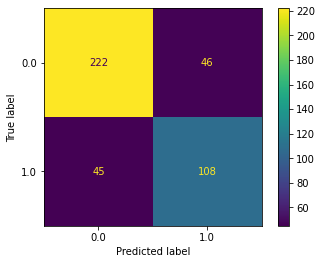

In [ ]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=alg.classes_)
disp.plot()
plt.show()

# Tunando hiperparâmetros dos modelos que serao utilizando no StackingClassifier

## Logistic Regression

In [ ]:
modelo = LogisticRegression()

# Cria o RandomSearchCV

parameters = {'C': [0.01, 0.1, 1],
              'intercept_scaling': [1, 2, 3],
              'l1_ratio': [None, 0.1],
              'max_iter': [10, 100, 1000],
              'multi_class': ['auto', 'ovr', 'multinomial'],
              'penalty':['l1', 'l2', 'elasticnet', None],
              'random_state': [1, 100, 6664],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'tol': [0.1, 0.001, 0.0001],
              'verbose': [0, 1, 2]}

modelRS = RandomizedSearchCV(modelo, parameters,cv=5, scoring='accuracy')

# Treina os modelos e guarda na variável modelRS o melhor modelo
modelRS.fit(X_train, y_train)
modelRS.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 

convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds
convergence after 8 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/loc

max_iter reached after 0 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 841 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds
[LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


[LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 3 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 545 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_par

max_iter reached after 0 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


{'verbose': 1,
 'tol': 0.0001,
 'solver': 'sag',
 'random_state': 100,
 'penalty': None,
 'multi_class': 'ovr',
 'max_iter': 1000,
 'l1_ratio': None,
 'intercept_scaling': 3,
 'C': 0.01}

In [ ]:
print(modelRS.best_score_)
print(modelRS.best_params_)

0.7658730158730159
{'verbose': 1, 'tol': 0.0001, 'solver': 'sag', 'random_state': 100, 'penalty': None, 'multi_class': 'ovr', 'max_iter': 1000, 'l1_ratio': None, 'intercept_scaling': 3, 'C': 0.01}


In [ ]:
reglog_best = modelRS.best_estimator_
reglog_best

LogisticRegression(C=0.01, intercept_scaling=3, max_iter=1000,
                   multi_class='ovr', penalty=None, random_state=100,
                   solver='sag', verbose=1)

In [ ]:
y_pred = reglog_best.predict(X_test)
print('Acc treino: ', reglog_best.score(X_train, y_train ))
print('Acc teste: ', reglog_best.score(X_test, y_test ))
print( 'F1_score: ', f1_score(y_test, y_pred, average='macro' ))

Acc treino:  0.7642857142857142
Acc teste:  0.7933491686460807
F1_score:  0.7769977777101282


## Adaboost

In [ ]:
modelo = AdaBoostClassifier()

# Cria o GridSearchCV

parameters = {'algorithm': ['SAMME.R', 'SAMME'], 
              'learning_rate': [1.0, 2.0, 3.0], 
              'n_estimators': [50, 100, 200],
              'random_state': [500, 501, 502, 503]}

modelGS = GridSearchCV(modelo, parameters,cv=5, scoring='accuracy')

# Treina os modelos e guarda na variável modelGS o melhor modelo
modelGS.fit(X_train, y_train)
modelGS.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 500}

In [ ]:
print(modelGS.best_score_)
print(modelGS.best_params_)

0.7579365079365079
{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 500}


In [ ]:
reglog_best = modelGS.best_estimator_
reglog_best

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=500)

In [ ]:
y_pred = reglog_best.predict(X_test)
print('Acc treino: ', reglog_best.score(X_train, y_train ))
print('Acc teste: ', reglog_best.score(X_test, y_test ))
print( 'F1_score: ', f1_score(y_test, y_pred, average='macro' ))

Acc treino:  0.7793650793650794
Acc teste:  0.7909738717339667
F1_score:  0.7741195980879914


## SVC

In [ ]:
modelo = SVC()

# Cria o RandomSearchCV

parameters = {'C': [1, 3, 5,], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'degree': [3, 5, 7],
              'gamma': ['scale', 'auto'],
              'tol': [1, 0.01, 0.001],
              'max_iter': [-1, 100, 1000],
              'decision_function_shape': ['ovo', 'ovr']}

modelRS = RandomizedSearchCV(modelo, parameters,cv=5, scoring='accuracy')

# Treina os modelos e guarda na variável modelRS o melhor modelo
modelRS.fit(X_train, y_train)
modelRS.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-proce

{'tol': 0.001,
 'max_iter': -1,
 'kernel': 'linear',
 'gamma': 'auto',
 'degree': 7,
 'decision_function_shape': 'ovr',
 'C': 5}

In [ ]:
print(modelRS.best_score_)
print(modelRS.best_params_)

0.7587301587301587
{'tol': 0.001, 'max_iter': -1, 'kernel': 'linear', 'gamma': 'auto', 'degree': 7, 'decision_function_shape': 'ovr', 'C': 5}


In [ ]:
reglog_best = modelRS.best_estimator_
reglog_best

SVC(C=5, degree=7, gamma='auto', kernel='linear')

In [ ]:
y_pred = reglog_best.predict(X_test)
print('Acc treino: ', reglog_best.score(X_train, y_train ))
print('Acc teste: ', reglog_best.score(X_test, y_test ))
print( 'F1_score: ', f1_score(y_test, y_pred, average='macro' ))

Acc treino:  0.7531746031746032
Acc teste:  0.7980997624703088
F1_score:  0.7802457612026454


# Colocando os modelos hipertunados no stacking

In [ ]:
estimators = [('lr',LogisticRegression(C=0.01, intercept_scaling=3, max_iter=1000,
                   multi_class='ovr', penalty=None, random_state=100,
                   solver='sag', verbose=1)),('svr',SVC(max_iter= 2000, C=5, degree=7, gamma='auto', kernel='linear')),('ada',AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=500))]

n_train = []
n_test = []

alg = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(C=0.01, intercept_scaling=3, max_iter=1000,
                   multi_class='ovr', penalty=None, random_state=100,
                   solver='sag', verbose=1))

alg.fit(X_train, y_train)
n_train.append(alg.score(X_train,y_train))
n_test.append(alg.score(X_test,y_test))

y_pred1 = alg.predict(X_test)
matrix = confusion_matrix(y_test,y_pred1)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 841 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (m

max_iter reached after 0 seconds


In [ ]:
print(n_train) # Acuracia de treino
print(n_test) # Acuracia de teste
print(f1_score(y_test,y_pred1)) # F1_score

[0.7904761904761904]
[0.8052256532066508]
0.7302631578947368


Matriz de Confusão: 
    0 = adjuvante 	 1 = neoadjuvante


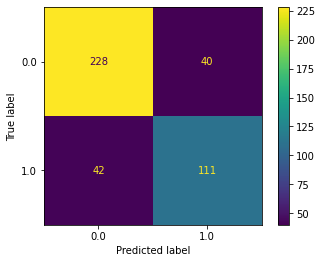

In [ ]:
# Fazer previsões com o modelo treinado usando os dados de teste
print('Matriz de Confusão: \n    0 = adjuvante \t 1 = neoadjuvante')
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=alg.classes_)
disp.plot()
plt.show()

Depois dos testes de varios modelos utilizando grid search e random search, foi possível identificar, através das métricas, que o StackingClassifier (otimizado utilizando o gridsearch) se saiu melhor que os outros modelos, pois apresentou uma melhor generalização, possuiu uma acuracia no conjunto de teste melhor e uma matriz de confusão com a diagonal principal com valores maiores.